In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('imaging_studies.csv', parse_dates=['DATE'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id_x,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,Id_y,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,b58731cc-2d8b-4c2d-b327-4cab771af3ef,1970-05-16,NaN,999-90-2484,S99978036,X78170348X,Mrs.,Isabel214,Lucio648,NaN,...,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08 15:35:36+00:00,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,2ffe9369-24e4-414b-8973-258fad09313a,1958-07-01,NaN,999-76-2715,S99927965,X70120330X,Mrs.,Amada498,Reichert620,NaN,...,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22 18:58:37+00:00,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,1959-05-26,NaN,999-59-1261,S99917383,X23685647X,Mrs.,Anissa357,Wuckert783,NaN,...,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01 02:08:27+00:00,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2000-11-21,2012-11-21,999-28-2716,NaN,NaN,NaN,Carmelia328,Konopelski743,NaN,...,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03 20:46:46+00:00,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,d49f748f-928d-40e8-92c8-73e4c5679711,1967-06-14,NaN,999-15-5162,S99979086,X15362198X,Mr.,Wesley533,Rau926,NaN,...,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08 08:42:44+00:00,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage


In [3]:
dt_stop = df_al['DATE'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2014-07-08 15:35:36+00:00', '2014-01-22 18:58:37+00:00',
 '2001-12-01 02:08:27+00:00', '2004-07-03 20:46:46+00:00',
 '2017-02-08 08:42:44+00:00', '2019-10-20 23:28:40+00:00',
 '2011-11-25 20:21:56+00:00', '2012-01-25 06:49:23+00:00',
 '2015-05-09 06:49:23+00:00', '2011-11-06 11:11:47+00:00',
 ...
 '1976-09-29 17:27:52+00:00', '1977-03-28 17:27:52+00:00',
 '1953-11-25 05:05:25+00:00', '1983-09-28 17:27:52+00:00',
 '1984-03-26 17:27:52+00:00', '1984-09-23 17:27:52+00:00',
 '1987-09-27 17:27:52+00:00', '1988-03-25 17:27:52+00:00',
 '1989-03-20 17:27:52+00:00', '1990-03-15 17:27:52+00:00']
Length: 737, dtype: datetime64[ns, UTC]

In [4]:
df_al['DATE'] = df_al['DATE'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['DATE'] = df_al['DATE'].replace({pd.NaT: "0"})
df_al['DATE']

0      1
1      1
2      1
3      1
4      1
      ..
850    1
851    1
852    1
853    1
854    1
Name: DATE, Length: 855, dtype: int64

In [5]:
contigency = pd.crosstab(df_al['DATE'], df_al['SOP_DESCRIPTION'])
contigency

SOP_DESCRIPTION,CT Image Storage,Digital X-Ray Image Storage,Digital X-Ray Image Storage – for Presentation,Ultrasound Image Storage,Ultrasound Multiframe Image Storage
DATE,,,,,
1,328,217,137,1,172


<AxesSubplot:xlabel='SOP_DESCRIPTION', ylabel='DATE'>

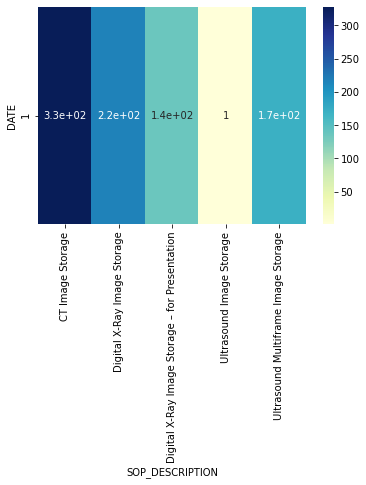

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'SOP_DESCRIPTION']
label_column = ['DATE']

In [9]:
dataset = df_al[features_column + label_column]
dataset['DATE'] = dataset['DATE'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'SOP_DESCRIPTION': Index(['CT Image Storage', 'Digital X-Ray Image Storage',
       'Digital X-Ray Image Storage – for Presentation',
       'Ultrasound Image Storage', 'Ultrasound Multiframe Image Storage'],
      dtype='object')}


<ipython-input-9-ad9e2bfc53a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE'] = dataset['DATE'].astype('int32')
<ipython-input-9-ad9e2bfc53a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-ad9e2bfc53a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('DATE')
test_labels = test_features.pop('DATE')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 1.0467 - accuracy: 0.0201 - val_loss: 0.6415 - val_accuracy: 0.1971
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.6033 - val_loss: 0.2371 - val_accuracy: 0.8540
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.8830 - val_loss: 0.1536 - val_accuracy: 0.9416
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9324 - val_loss: 0.1122 - val_accuracy: 0.9708
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9580 - val_loss: 0.0847 - val_accuracy: 0.9708
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9561 - val_loss: 0.0654 - val_accuracy: 0.9708
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9707 - val_loss: 0.0542 - val_accuracy: 0.9927
Epoch 8/100
1

In [15]:
model.evaluate(test_features[features_column], test_labels)

6/6 [==============================] - 0s 600us/step - loss: 0.0411 - accuracy: 1.0000


[0.041081905364990234, 1.0]

In [16]:
model.save('model_imaging_procedures')

INFO:tensorflow:Assets written to: model_imaging_procedures\assets
